# Table of Contents
- **<a href='#saving'>Saving Data and Objects</a>**<br>
- **<a href='#numpy'>Numpy Continued</a>**<br>
- **<a href='#matplotlib'>Plotting Library 1 - Matplotlib</a>**<br>
- **<a href='#exercise1'>Exercise: 70's & 80's Automotive Data</a>**<br>
- **<a href='#exercise2'>Exercise: Acceleration of the Universe</a>**<br>
- **<a href='#geo'>Geographical Data</a>**<br>
- **<a href='#images'>Images</a>**<br>
- **<a href='#sound'>Sound</a>**<br>
- **<a href='#pandas'>Other Plotting Libraries I: Pandas</a>**<br>
- **<a href='#time'>Time Series</a>**<br>
- **<a href='#seaborn'>Other Plotting Libraries II: Seaborn</a>**<br>
- **<a href='#afternoon1'>Afternoon Project I: SDSS Galaxy Images</a>**<br>
- **<a href='#afternoon2'>Afternoon Geo Projects II: US Wildfire Data or Uber Ride History</a>**<br>
- **<a href='#afternoon3'>Afternoon Project III: Germany Energy Consumption</a>**<br>
- **<a href='#afternoon4'>Afternoon Project IV: Stock Trading Strategy</a>**<br>


<a id='saving'></a>
# Saving Data and Objects

### Compressed Numpy Files

In [ ]:
import numpy as np

In [ ]:
lots_of_data1 = np.arange(10)*2/57
lots_of_data2 = np.linspace(0,11,777)**2

In [ ]:
#save your hard work (maybe something that was computationally intensive)
np.savez('save_my_progress.npz',mydata1=lots_of_data1,mydata2=lots_of_data2)

In [ ]:
#you can come back later and re-load those right back in
reloaded = np.load('save_my_progress.npz')
reloaded['mydata1']

### Pickle-ing

In [ ]:
#Let's make a class to pickle
class Vehicle:
    def __init__(
        self, 
        name = None,
        number_of_wheels = None,
        top_speed = None,
        ):
        
        self.name = name
        self.nwheels = number_of_wheels
        self.topspeed = top_speed
        self.currentspeed = 0
        
    def accelerate(self,how_much=1):
        self.currentspeed += how_much
        print('vroooooommmm')
        
mustang = Vehicle(
            name = 'Elanor',
            number_of_wheels = 4,
            top_speed = 200)
print(mustang.name)
mustang.accelerate()

In [ ]:
#reminder that you may not be creating classes but you are definitely using them. For example:
arr = np.ones((100,2))
print(arr.dtype)
print(arr.sum(axis=1))

In [ ]:
import pickle

#We can pickle the class though, and get back what we put in
outfile = open('vehicle.pkl','wb') #lets python know we're about to write bytes (not string)
pickle.dump(mustang,outfile)
outfile.close()

In [ ]:
myReadInOldVehichle = pickle.load(open('vehicle.pkl','rb'))
print(myReadInOldVehichle.name)

### Saving in a human readable format = JSON

In [ ]:
#Dictionary
pets_info = {
    'cat':{'color':'black','weight':10,'toys':['string','box','squeaky']},
    'dog':{'color':'white','weight':40,'toys':['ball','frisbee','squeaky']}
}

In [ ]:
import json
print(json.dumps(pets_info, indent=4))

In [ ]:
outfile = open('pets.json','w')
outfile.write(json.dumps(pets_info, indent=4))
outfile.close()

In [ ]:
readbackin =open('pets.json','r').read()
dictionary_read_back_in = json.loads(readbackin)
dictionary_read_back_in['dog']

<a id='numpy'></a>

# Numpy Continued...

In [ ]:
import numpy as np

In [ ]:
a = np.zeros((2,2))   # Create an array of all zeros
print('zeros\n',a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print('ones\n',b)              # Prints "[[ 1.  1.]]"

c = np.array([[1,1],[2,2]])  # Create a matrix
print('matrix\n',c)               
                       
d = np.eye(2)         # Create a 2x2 identity matrix
print('identity\n',d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

rando = np.random.random((5,3))  # Create an array filled with random values
print('random\n',rando)                     
                            


In [ ]:
#you can set some/all elements at once
rando[3,:] = 0
print(rando)

In [ ]:
#you can specify a list of rows/columns
rando[[1,2],:] = 0
print(rando)

In [ ]:
print(rando.shape)

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

In [ ]:
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))


In [ ]:
x = np.array([[1,2],[3,4]])
v = np.array([9,10])

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

# Matrix / matrix product; both produce the rank 2 array
print(x.dot(y))
print(np.dot(x, y))

### Numpy will compute many quantities along any specified axis

In [ ]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

In [ ]:
!ls ../input/

<a id='plotting'></a>
# Plotting Library 1 - Matplotlib

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');
#plt.savefig('test.pdf')

In [ ]:
fig.canvas.get_supported_filetypes()

In [ ]:
plt.savefig('test1.pdf')
!ls

## Marker Styling

In [ ]:
rng = np.random.RandomState(0)
plt.figure(figsize=(12,8))
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, ms=13,
             label="marker=%s"%(marker))
plt.legend()
plt.xlim(0, 1.8);

## Colors and sizes

In [ ]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.figure(figsize=(12,8))
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale


## Error Bars

In [ ]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.figure(figsize=(12,8))
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=3);


# Matlab style interface

In [ ]:
#Now lets read in some vehicle data
data = np.genfromtxt('../input/mpg-data/Auto.txt', names=True, usecols=range(7))
print(type(data))
print(data.dtype)

In [ ]:
plt.figure(figsize=(14,11))  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.scatter(data['horsepower'], data['acceleration'],color='blue',s=4)
plt.xlabel('Horespower')
plt.ylabel('Acceleration')

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.scatter(data['horsepower'], data['mpg'],color='orange',s=4)
plt.xlabel('Horespower')
plt.ylabel('Miles Per Gallon');

# plt.subplot(3, 1, 3)
# plt.scatter(data['horsepower'], data['weight'])
# plt.xlabel('Horespower')
# plt.ylabel('Weight')
# #plt.tight_layout()

# Object Oriented Interface

In [ ]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
print(type(axes))
print(axes.shape)
axes[0,0].scatter(data['horsepower'], data['acceleration'])
axes[0,0].set_xlabel('Horsepower');
plt.tight_layout()

<a id='exercise1'></a>
# Exercise: 70's & 80's Automotive Data 
- Plot a 7x7 grid of all possible combinations of features (columns) of automotive data (scatter plots)
- color the data points red if the car was built before '77 and green if built in or after '77
- on the diagonal, plot histograms.
- add a legend of the years to the plot


In [ ]:
#your code here

## More Plotting

In [ ]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
plt.plot(x,y);

In [ ]:
from scipy.interpolate import interp1d
f = interp1d(x, y) # default is linear
f2 = interp1d(x, y, kind='cubic')
#notice that f and f2 are now functions!


In [ ]:
f(5);

In [ ]:
f([2,3,4]);

In [ ]:
xnew = np.linspace(0, 10, num=99) # lets make it smooth now
plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', label='data')
plt.plot(xnew, f(xnew), '-', label='linear')
plt.plot(xnew, f2(xnew), '--', label='cubic')
plt.legend(loc='best', fontsize=16);

<a id='exercise2'></a>
# Exercise: Measuring the accelerating universe

In [ ]:
#This is the most recent dataset of Supernovae from the UPenn affiliated Dark Energy Survey
data = np.genfromtxt('../input/des-supernova-data-and-model/DARK_ENERGY_SURVEY_SUPERNOVA.txt', names=True)
xdat = data['zHD'] #velocity
ydat = data['MU'] #distance
ydaterr = data['MUERR']

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(xdat,ydat,s=10)
plt.xlabel('Velocity',fontsize=20)
plt.ylabel('Distance',fontsize=20);

## In this exercise I want you to (in groups of 2 people):

- make two plots stacked on top of each other.
- TOP: plot the x and y datapoints as a scatter plot with error bars
- TOP: plot the model of the universe
- Bottom: Plot the residuals between the data and the accelerating model
- Bottom: plot a horizontal line at zero
- Bottom: plot the residuals between the accelerating model and the decelerating model
- Bottom: place a legend that designates which model is which
- BOTH: color the datapoints by their value in the column *SURVEY* (which indicates which telescope took the data)
- Top: place a legend that designates which *SURVEY* is which color
- Bottom: place a legend that designates each model (matter and accel) and shows the chi squared between the data and the model.
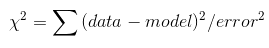


In [ ]:
#This is a model for the universe that is decelerating (no dark energy)
matter_only_universe = np.genfromtxt('../input/des-supernova-data-and-model/decelerating_universe.txt', names=True, delimiter=',')
xmatter = matter_only_universe['zHD']
ymatter = matter_only_universe['MU']

#This is a model for the universe that is accelerating (yes dark energy)
dark_energy_filled_universe_model = np.genfromtxt('../input/des-supernova-data-and-model/accelerating_universe.txt', names=True, delimiter=',')
xaccel = dark_energy_filled_universe_model['zHD']
yaccel = dark_energy_filled_universe_model['MU']

In [ ]:
#your code here

<a id='histograms'></a>
# Histograms

In [ ]:
x = np.random.normal(size=1000)

fig, ax = plt.subplots()

H = ax.hist(x, bins=50, alpha=0.5, histtype='stepfilled')

In [ ]:
fig, ax = plt.subplots()

H = ax.hist(x, bins=np.arange(-3,4,1), alpha=0.5, histtype='step',linewidth=4, density=True) #density=normalized


# 2D Histograms

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
n_components = 3
DATA, _ = make_blobs(n_samples=2000, centers=n_components, 
                      cluster_std = [5, 2.5, 2], 
                      random_state=42)


In [ ]:
#Extract x and y
x = DATA[:,0]
y = DATA[:,1]

In [ ]:
plt.scatter(x, y, s=10)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y");

In [ ]:
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 5))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].scatter(x, y,s=10,color='black')
# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r);


<a id='contours'></a>
# Contour Plots

In [ ]:
def f1(x,y):
    from scipy.stats import norm
    Z = norm.pdf(X)*norm.pdf(Y)
    return Z

In [ ]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(x, y)

Z = f1(X, Y)

#plt.contourf(X, Y, Z, alpha=.3)
plt.contour(X, Y, Z)


In [ ]:
plt.contour(X, Y, Z, levels = [.01, .05, .1])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, 
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2);


<a id='geo'></a>

# Plotting Geographical Data

In [ ]:
%matplotlib inline 
#we have to reset because I dont want any more interactive plots
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
#philadelphia
centerlat = 39.95
centerlon = -75.16
m = Basemap(projection='lcc', #resolution='h', 
            lat_0=centerlat, lon_0=centerlon,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawstates(color='gray')
m.scatter(centerlon,centerlat,s=1000,c='blue',latlon=True)


## Exercise: Just plot the locations of populations >200,000 and make the size of each point is the square_root(population-200,000). Add a legend.

In [ ]:
cities = np.genfromtxt('../input/california-cities/california_cities.csv',names=True,delimiter=',')

# Extract the data we're interested in
lat = cities['latd']
lon = cities['longd']
population = cities['population_total']


In [ ]:
#your code here

<a id='images'></a>
# Plotting images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#raw files are extremely efficient (binary data)
im = np.fromfile('../input/ctscan/ct.raw',dtype=np.uint16).reshape((512,512)) #need to specify the size and dtype to recover the original image


plt.figure(figsize=(8,8))

extent = (0, 10, 0, 10) #you get to define the axes
_ = plt.imshow(im, cmap=plt.cm.hot, extent=extent)

plt.scatter(6.8, 6, facecolors='none', edgecolors='blue', s=500)
plt.scatter(6.4, 5.9, facecolors='none', edgecolors='blue', s=500)
plt.text(5.8, 7.,'Something Bad?',color='white',rotation=30,fontsize=12);

In [ ]:
# Lets do some edge detection for fun
from skimage import feature
edges1 = feature.canny(im.astype(float), sigma=8)
plt.imshow(edges1, cmap=plt.cm.gray)

<a id='sound'></a>
# Sound

In [ ]:
fname = '../input/freesound/jazzy.wav'
import IPython.display as ipd  # To play sound in the notebook
ipd.Audio(fname)

In [ ]:
# Using scipy
from scipy.io import wavfile
rate, data = wavfile.read(fname)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape);

In [ ]:
five_seconds = rate*5
plt.plot(data[:five_seconds,0]);

In [ ]:
plt.specgram(data[:five_seconds,0], Fs=rate, cmap=plt.get_cmap('jet'));

<a id='pandas'></a>
# Other plotting frameworks I: Pandas
### It is built on top of matplotlib (so knowledge of matplot lib is helpful!).

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!head -10 ../input/mpg-data/Auto.txt

In [ ]:
#Lets read in that old Auto data into a dataframe
df = pd.read_csv('../input/mpg-data/Auto.txt',delimiter='\t')

In [ ]:
#Dataframes are useful for a number of reasons. First of all, they're pretty.
df.head(10)

In [ ]:
df['horsepower'].plot.hist()

In [ ]:
df.groupby('year').mean()
#This is a new table that we can plot!

In [ ]:
df.groupby('year').mean()['horsepower'].plot(figsize=(10,7))
plt.ylabel('horsepower');

In [ ]:
df.groupby('year').mean()['acceleration'].plot(figsize=(10,7))
plt.ylabel('acceleration');

In [ ]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(16, 12), diagonal='hist');

In [ ]:
color_palette = {0: "red", 1: "green"}
mycolors = [color_palette[int(c)] for c in df['year']>=75]   
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(16, 12), diagonal='kde', color=mycolors);


<a id='time'></a>
## Pandas Time Series

In [ ]:
import pandas as pd
print(pd.to_datetime('2018-01-15 3:45pm'))

In [ ]:
import pandas_datareader.data as web
import datetime

# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2018,1,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "yahoo", start, end)
print(apple.columns)

In [ ]:
apple['Close'].plot()

In [ ]:
google = web.DataReader("GOOG", "yahoo", start, end)

In [ ]:
#lets make a new dataframe with all our stocks
stocks = pd.DataFrame({"AAPL": apple["Close"],
                      "GOOG": google["Close"]})
 

### lets say I want to compare the percentage increase between Apple and Google

In [ ]:
def percent_increase(stock):
    return stock/stock[0]

In [ ]:
stock_return = stocks.apply(percent_increase)
stock_return.head()#look we have a new dataframe where our function was applied

In [ ]:
stock_return.plot(figsize=(10,6));
plt.axhline(1,color='k',linestyle='--')

<a id='seaborn'></a>
# Other Plotting Frameworks II: Seaborn

### Seaborn is great tool for visualizing high dimesional data, especially from pandas dataframes. So knowledge of Pandas is essential.

Here's a link to the documentation: https://seaborn.pydata.org/

In [ ]:
import seaborn as sns

In [ ]:
# We'll use a built in dataset from seaborn
# this requires that your kernel is connected to the internet
titanic = sns.load_dataset('titanic')
titanic.head()
#oh look its a pandas dataframe!

In [ ]:
# Let's start with a histogram of a single variable
sns.distplot(titanic['fare'],kde=False,color="red",bins=30)

In [ ]:
# You can also joint plots: essentially histograms with two variables
sns.jointplot(x="fare",y="age",data=titanic,kind="scatter");

In [ ]:
sns.jointplot(x="fare",y="age", data=titanic, kind='kde')
#sns.jointplot(x="fare",y="age", data=titanic, kind='kde', xlim=[0,60]);

In [ ]:
# Easily visualize categorical variables with boxplots, violin plots, or swarm plots
sns.boxplot(x="class",y="age", data=titanic);

In [ ]:
# Make heatmaps - note that you need to transform your data into a matrix form first.
# The pandas fuction corr will make correlation matrices of numerical variables
plt.figure(figsize=(14,10))
sns.heatmap(titanic.corr(),cmap="coolwarm");

In [ ]:
# One epecially useful plot for exploratory data analysis is a pair plot,
# which shows you distributions and scatterplots for all your variables

# we're going to select only a few variables so it is easier to see
titanic_subset = titanic[["survived","age","fare","sex","alone"]]
sns.pairplot(titanic_subset,hue='survived',palette='coolwarm');

In [ ]:
#plot_kws (keword args) allows us to change just about anything that can be changed in matplotib
sns.pairplot(titanic_subset,hue='survived',palette='coolwarm',plot_kws={"s": 3}); 

## Lets go back to the now familiar Automotive data...

In [ ]:
df = pd.read_csv('../input/mpg-data/Auto.txt',delimiter='\t')
g = sns.FacetGrid(df, col="origin") #lets set up a grid of plots grouping by origin
g.map(sns.distplot, "horsepower");

In [ ]:
g = sns.FacetGrid(df, col="origin") #lets set up a grid of plots grouping by origin
g.map(sns.kdeplot, "horsepower", "acceleration");

In [ ]:
g = sns.FacetGrid(df, col="origin") #lets set up a grid of plots grouping by origin
g.map(plt.scatter, "horsepower", "acceleration", s=10);

# R-style plotting (ggplot)

https://nipunbatra.github.io/blog/2017/50-ggplot-python-1.html

# Last but not least. The notebook Viewer!

https://nbviewer.jupyter.org

<a id='afternoon1'></a>
# Afternoon Project I: SDSS Galaxy Data
### Please dont forget to make your kernel public so the whole class can see.
https://www.kaggle.com/dbrout/sdss-galaxies-visualization

<a id='afternoon2'></a>
# Afternoon Geo Projects II: US Wildfire Data or Uber Trips in NYC
### Please dont forget to make your kernel public so the whole class can see.

https://www.kaggle.com/dbrout/us-wildfires-project

https://www.kaggle.com/dbrout/uber-trips-project


<a id='afternoon3'></a>
# Afternoon Project III: Germany Energy Consumption
### Please dont forget to make your kernel public so the whole class can see.

https://www.kaggle.com/dbrout/germany-power-consumption-project

<a id='afternoon4'></a>
# Afternoon Project IV: Stock Trading Strategy
### Please dont forget to make your kernel public so the whole class can see.

https://www.kaggle.com/dbrout/stock-trading-project